<a href="https://colab.research.google.com/github/Eddy-Santiago/El_Quimbo/blob/main/Preprocessing_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import data, constants and libraries

In [ ]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Constants
path_file = '/content/Data_Plots.xlsx'
BINS = 7
coordenates_xlsx = '/content/Coordenadas.xlsx'
#Import Data_Plots.xlsx
#Import Densidades.xlsx
#Import Coordenadas.xlsx

In [ ]:
plots = pd.read_excel(path_file) #Import data.

In [ ]:
plots.head(5) #View data

,Parcela,Edades Aprox,Codigo,Grupo_Florístico,Zona,Tipo de parcela,UM,Poligono,Sector,Fecha,...,Estrato,CAT.DIAM,Abund Total grupo,Abun % grupo,A. basal Total Grupo,A. basal % Grupo,IPF Grupo,IPF % Grupo,Unnamed: 56,Etiquetas de fila
0,1,6 -- 15,Z3PC00AF01,A,Z3,PC,AF-MBA,Poligono antiguo,La laguna,2015-10-01,...,Arbustivo,Latizal bajo,834,0.119904,6.710028,0.017078,0.136982,0.068491,1.0,1
1,1,6 -- 15,Z3PC00AF01,A,Z3,PC,AF-MBA,Poligono antiguo,La laguna,2015-10-01,...,Arbolitos,I,834,0.119904,6.710028,0.145279,0.265183,0.132591,2.0,2
2,1,6 -- 15,Z3PC00AF01,A,Z3,PC,AF-MBA,Poligono antiguo,La laguna,2015-10-01,...,Arbustivo,Latizal alto,834,0.119904,6.710028,0.030360,0.150264,0.075132,3.0,3
3,1,6 -- 15,Z3PC00AF01,A,Z3,PC,AF-MBA,Poligono antiguo,La laguna,2015-10-01,...,Arbustivo,Latizal bajo,834,0.119904,6.710028,0.009606,0.129510,0.064755,4.0,4
4,1,6 -- 15,Z3PC00AF01,A,Z3,PC,AF-MBA,Poligono antiguo,La laguna,2015-10-01,...,Arbolitos,Latizal alto,834,0.119904,6.710028,0.074122,0.194026,0.097013,5.0,5


#Explore data - I need biomass by Chave et al, 2014


AGB =  0.0673 * (p * DAP^2 * H)^0.936

- p in (g / cm3)
- DAP in (cm)
- H in (m)

## How many....

In [ ]:
 #Which unique values Species?
print( 'Species: ', plots['Nombre Concatenado'].unique() )

#How many values (Species) ?
print( 'Total Species: ', plots['Nombre Concatenado'].nunique())

 #Which unique values genus?
plots['Genero'].replace(to_replace= 'Stylogine', value='Stylogyne', inplace = True) #Change "Stylogine" - "Stylogyne "
print( 'Genus: ', plots['Genero'].unique() )

#How many values (Genus) ?
print( 'Total Genus: ', plots['Genero'].nunique())

#Which unique values Families?
print( '\nFamilies: ', plots['Familia'].unique() )

#How many values (Families) ?
print( 'Total Families: ', plots['Familia'].nunique())

Species:  ['Bursera tomentosa' 'Citharexylum kunthianum' 'Clusia ellipticifolia'
 'Croton glabellus' 'Croton hibiscifolius' 'Erythroxylum haughtii'
 'Eugenia sp.' 'Ficus insipida' 'Myrsine guianensis' 'Simira cordifolia'
 'Stylogyne cf. turbacensis' 'Trichilia hirta' 'Xylosma cf. velutina'
 'Zanthoxylum rhoifolium' 'Zanthoxylum rigidum' 'Amyris pinnata'
 'Astronium graveolens' 'Casearia corymbosa' 'Casearia praecox'
 'Guapira pubescens' 'Inga bourgonii' 'Jatropha sp.' 'Machaerium capote'
 'Trophis racemosa' 'Maclura tinctoria' 'Pseudobombax septenatum'
 'Myrcia sp.' 'Randia armata' 'Spondias mombin' 'Albizia niopoides'
 'Sapindus saponaria' 'Byrsonima crassifolia' 'Euphorbia cotinifolia'
 'Guazuma ulmifolia' 'Ochroma pyramidale' 'Aspidosperma cuspa'
 'Chloroleucon mangense' 'Piper sp.' 'Cestrum cf. megalophyllum '
 'Guettarda malacophylla' 'Bromelia karatas' 'Calliandra tolimensis'
 'Casearia mollis' 'Casearia sylvestris' 'Cordia alliodora'
 'Eugenia biflora' 'Hirtella americana' 'Mico

## Density calculate

In [ ]:
#dataframe - export Species
Species = plots['Nombre Concatenado'].unique()
Species = pd.Series(Species)
Species.to_excel("Species.xlsx", index = False) #Export to page http://db.worldagroforestry.org/wd

In [ ]:
#Import density file.
density = pd.read_excel('/content/Densidades.xlsx', sheet_name=None)
density_species = density['Species'] #Some species density
density_genus = density['Genus'] #Otherwise density

#Aux variables to add density to DataFrame Originally
especies = pd.DataFrame() #To Species
especies['Species'] = plots['Nombre Concatenado']
genus = pd.DataFrame() #To otherwise
genus['Species'] = plots['Genero']

#Merge especies and density_species
merge_species = especies.merge(density_species, how = 'left', on = 'Species')
#Merge genus and Otherwise
merge_genus = genus.merge(density_genus, how = 'left', on = 'Species')

#Concat merges
density_fully = pd.concat([merge_species, merge_genus], axis=1)
#Double merge and delete useless data
density_fully['Density'] = density_fully['wd'] #Look sheets Densidades.xlsx
mask = density_fully['Density'].isna()
density_fully.loc[mask, 'Density'] = density_fully.loc[mask, 'wd_2'] #Look sheets Densidades.xlsx

#Delete all columns except Density
density_fully = density_fully['Density']

#Concat with plots.
plots['Density (g/cm3)'] = density_fully

In [ ]:
plots.head(5)

,Parcela,Edades Aprox,Codigo,Grupo_Florístico,Zona,Tipo de parcela,UM,Poligono,Sector,Fecha,...,CAT.DIAM,Abund Total grupo,Abun % grupo,A. basal Total Grupo,A. basal % Grupo,IPF Grupo,IPF % Grupo,Unnamed: 56,Etiquetas de fila,Density (g/cm3)
0,1,6 -- 15,Z3PC00AF01,A,Z3,PC,AF-MBA,Poligono antiguo,La laguna,2015-10-01,...,Latizal bajo,834,0.119904,6.710028,0.017078,0.136982,0.068491,1.0,1,0.3451
1,1,6 -- 15,Z3PC00AF01,A,Z3,PC,AF-MBA,Poligono antiguo,La laguna,2015-10-01,...,I,834,0.119904,6.710028,0.145279,0.265183,0.132591,2.0,2,0.3451
2,1,6 -- 15,Z3PC00AF01,A,Z3,PC,AF-MBA,Poligono antiguo,La laguna,2015-10-01,...,Latizal alto,834,0.119904,6.710028,0.030360,0.150264,0.075132,3.0,3,0.6667
3,1,6 -- 15,Z3PC00AF01,A,Z3,PC,AF-MBA,Poligono antiguo,La laguna,2015-10-01,...,Latizal bajo,834,0.119904,6.710028,0.009606,0.129510,0.064755,4.0,4,0.6862
4,1,6 -- 15,Z3PC00AF01,A,Z3,PC,AF-MBA,Poligono antiguo,La laguna,2015-10-01,...,Latizal alto,834,0.119904,6.710028,0.074122,0.194026,0.097013,5.0,5,0.6862


## Biomass calculate and add to data

In [ ]:
#Calculate biomass
# AGB = 0.0673 * (p * DAP^2 * H)^0.936


#Calculate AGB
Density = plots['Density (g/cm3)'].to_numpy()
DAP = plots['DAP1(cm)'].to_numpy()
HT = plots['HT'].to_numpy()

Biomass = 0.0673 * (Density * DAP**2 * HT)**0.936
plots['AGB (kg)'] = Biomass

## Delete useless columns

In [ ]:
plots.columns #Columns

Index(['Parcela', 'Edades Aprox', 'Codigo', 'Grupo_Florístico', 'Zona',
       'Tipo de parcela', 'UM', 'Poligono', 'Sector', 'Fecha', 'Norte', 'Este',
       'Subparcela', 'No. Individuo', 'Categoria', 'Familia', 'Unnamed: 16',
       'Unnamed: 17', 'Genero', 'Nombre Concatenado', 'Nombre campo', 'CAP1',
       'CAP2', 'CAP3', 'DAP1(cm)', 'DAP2(cm)', 'DAP3(cm)', 'DAP mayor',
       'Abasal', 'A. basal x Lev', 'A. basal %', 'Abund Total/Lev',
       'Abund % individuo', 'IPF Total', 'IPF %', 'VT (m3)', 'VC (m3)',
       'Copa1', 'Copa2', 'Cobertura (m2)', 'Cob%', 'HT', 'Hcopa',
       'No. Rebrotes', 'Habito Foliar', 'Densidad Follaje', 'AD',
       'Observaciones', 'Estrato', 'CAT.DIAM', 'Abund Total grupo ',
       'Abun % grupo ', 'A. basal Total Grupo', 'A. basal % Grupo',
       'IPF Grupo', 'IPF % Grupo', 'Unnamed: 56', 'Etiquetas de fila',
       'Density (g/cm3)', 'AGB (kg)'],
      dtype='object')

In [ ]:
#yeah_duplicates = plots[plots.duplicated(keep = False)]#Rows duplicates ?  CAREFULLLLLLLLLLLLLLLLLLL
plots.drop_duplicates(inplace = True) #CAREFULLLLLLLLLLLLLLLLLLL
#yeah_duplicates

In [ ]:
Col_interest = ['Parcela', 'Edades Aprox', 'Grupo_Florístico', 'Zona', 'Familia', 'Genero', 'Nombre Concatenado', 'Estrato', 'DAP1(cm)', 'HT',
                'Density (g/cm3)', 'Habito Foliar', 'AGB (kg)']

In [ ]:
Data = plots.loc[:, Col_interest]

In [ ]:
Data.head(5)

,Parcela,Edades Aprox,Grupo_Florístico,Zona,Familia,Genero,Nombre Concatenado,Estrato,DAP1(cm),HT,Density (g/cm3),Habito Foliar,AGB (kg)
0,1,6 -- 15,A,Z3,Burseraceae,Bursera,Bursera tomentosa,Arbustivo,3.819719,3.0,0.3451,Caducifolia,0.854436
1,1,6 -- 15,A,Z3,Burseraceae,Bursera,Bursera tomentosa,Arbolitos,11.140846,7.0,0.3451,Caducifolia,14.007935
2,1,6 -- 15,A,Z3,Verbenaceae,Citharexylum,Citharexylum kunthianum,Arbustivo,5.092958,5.0,0.6667,Caducifolia,4.374193
3,1,6 -- 15,A,Z3,Clusiaceae,Clusia,Clusia ellipticifolia,Arbustivo,2.864789,4.0,0.6862,Caducifolia,1.242048
4,1,6 -- 15,A,Z3,Clusiaceae,Clusia,Clusia ellipticifolia,Arbolitos,7.957747,7.0,0.6862,Perenne,14.197891


#EDA (Exploratory Data Analysis)

In [ ]:
Data.shape #lenght df

(4605, 13)

In [ ]:
#Data[Data.duplicated(keep = False)]

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4605 entries, 0 to 4625
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Parcela             4605 non-null   object 
 1   Edades Aprox        4605 non-null   object 
 2   Grupo_Florístico    4605 non-null   object 
 3   Zona                4605 non-null   object 
 4   Familia             4605 non-null   object 
 5   Genero              4605 non-null   object 
 6   Nombre Concatenado  4605 non-null   object 
 7   Estrato             4605 non-null   object 
 8   DAP1(cm)            4605 non-null   float64
 9   HT                  4605 non-null   float64
 10  Density (g/cm3)     4605 non-null   float64
 11  Habito Foliar       4605 non-null   object 
 12  AGB (kg)            4605 non-null   float64
dtypes: float64(4), object(9)
memory usage: 503.7+ KB


In [ ]:
Data.nunique(axis=0) #How many unique values are from every column

Parcela                 79
Edades Aprox             3
Grupo_Florístico         8
Zona                     2
Familia                 56
Genero                 105
Nombre Concatenado     133
Estrato                  5
DAP1(cm)               338
HT                      59
Density (g/cm3)        101
Habito Foliar            5
AGB (kg)              3383
dtype: int64

## GrupBy "Edades Aprox"

In [ ]:
edad_plot = Data.groupby(by = 'Edades Aprox')

In [ ]:
edad_plot.groups.keys()

dict_keys(['2 -- 5', '6 -- 15', '> 30 '])

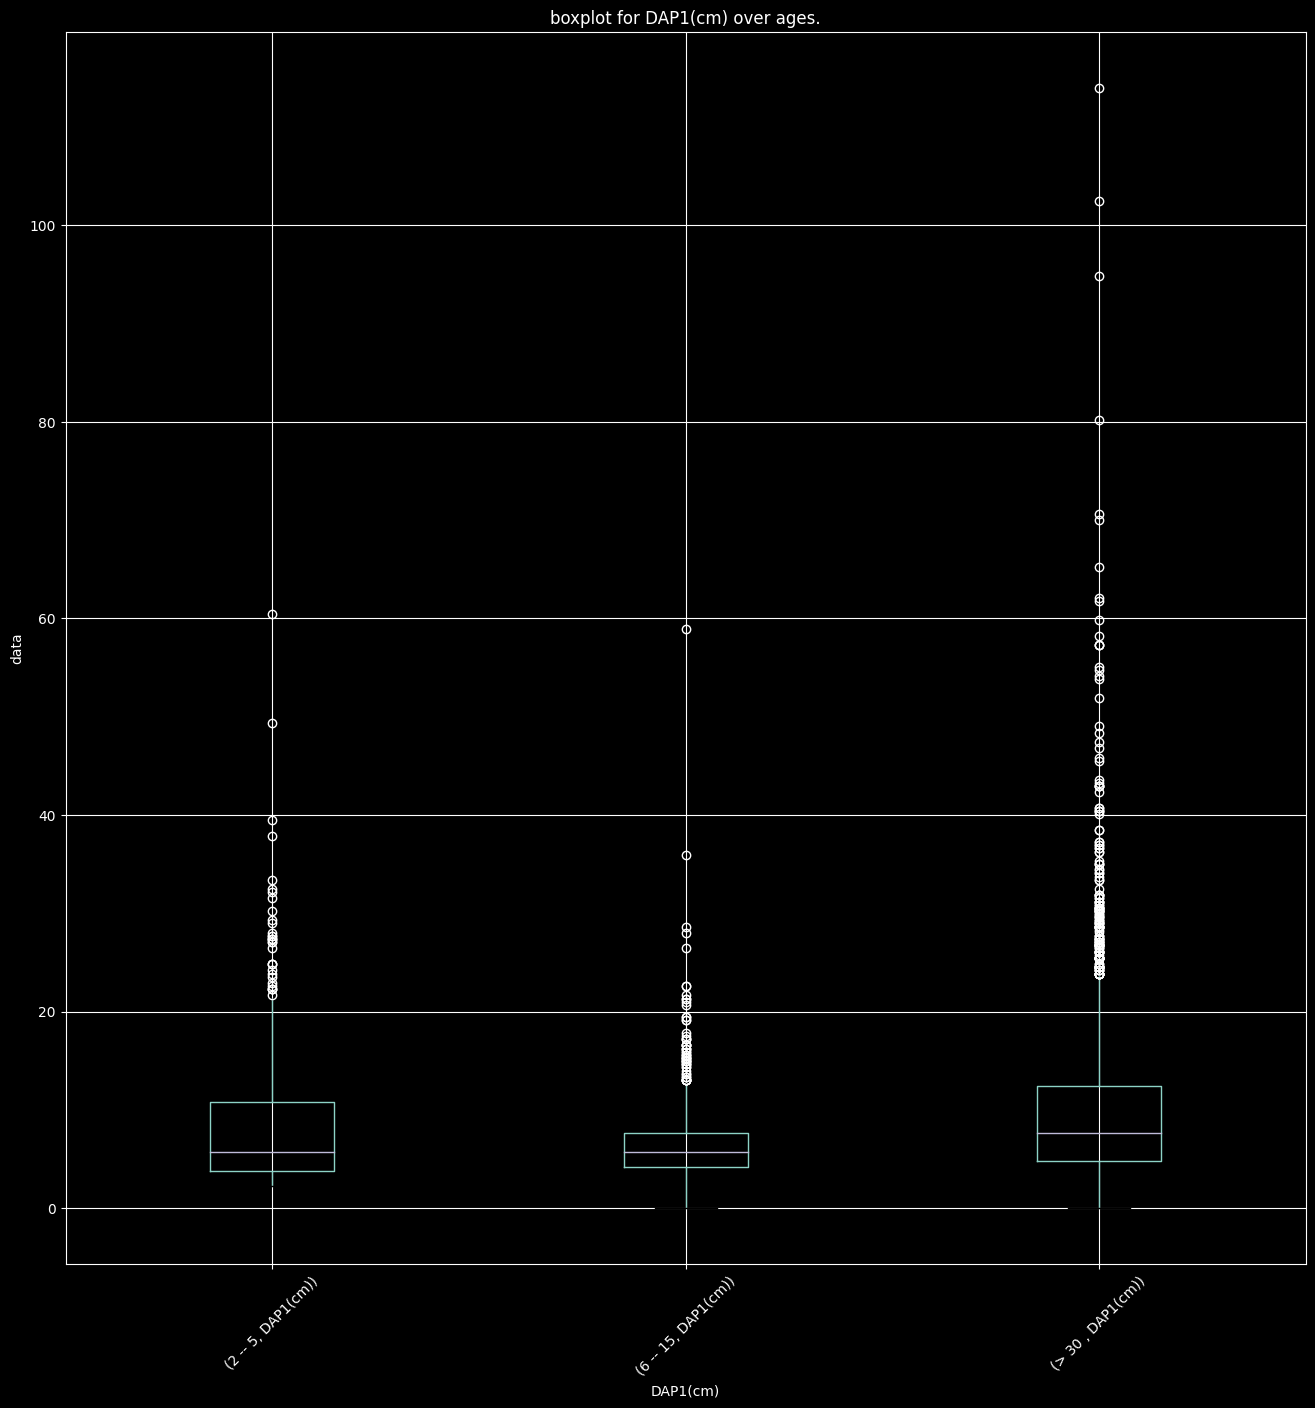

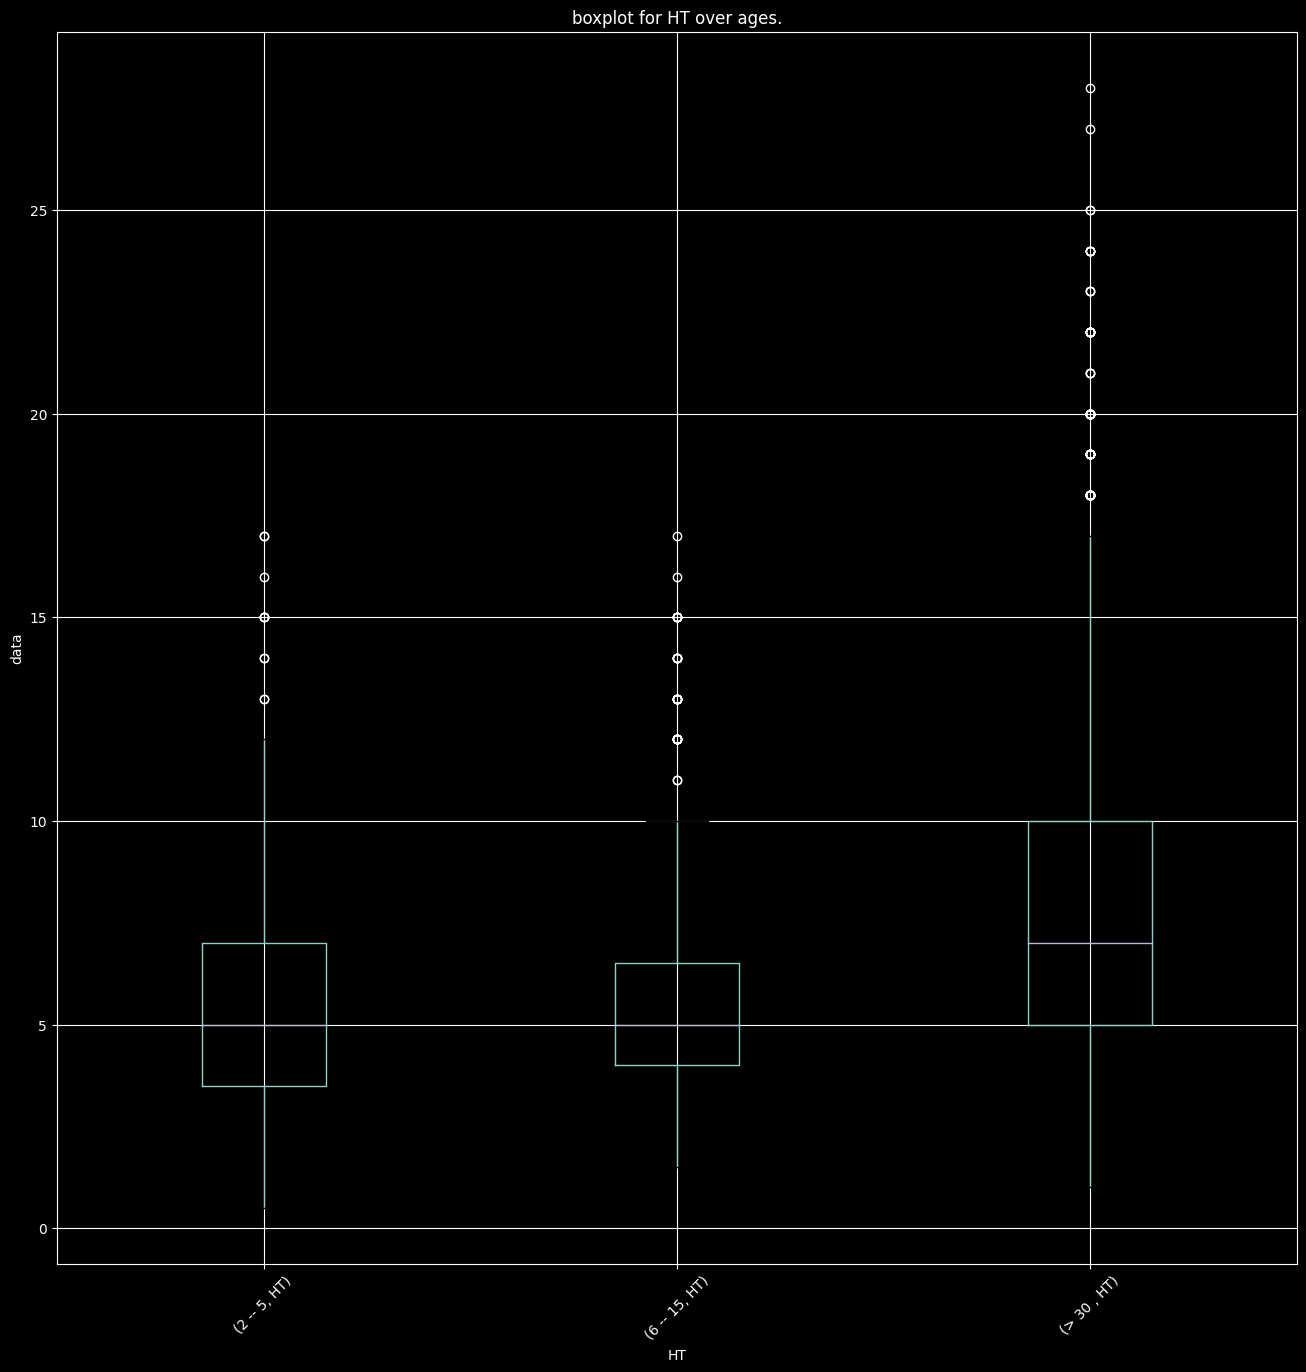

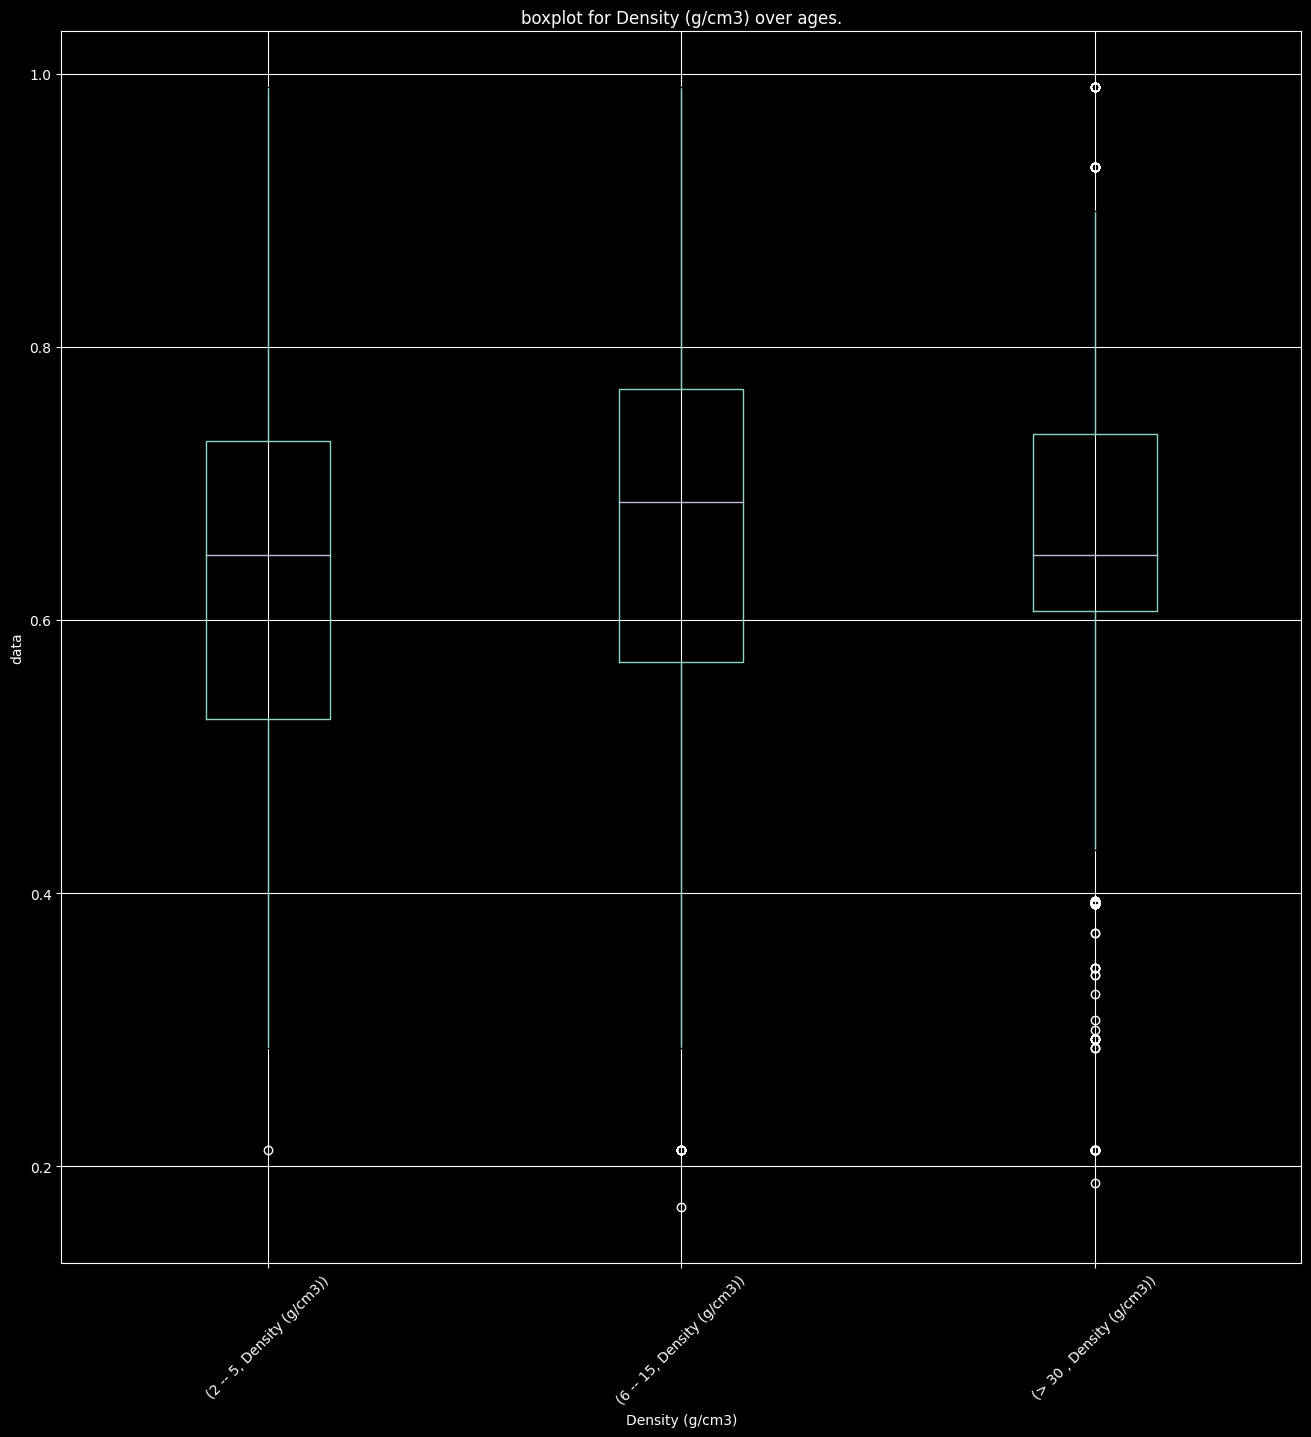

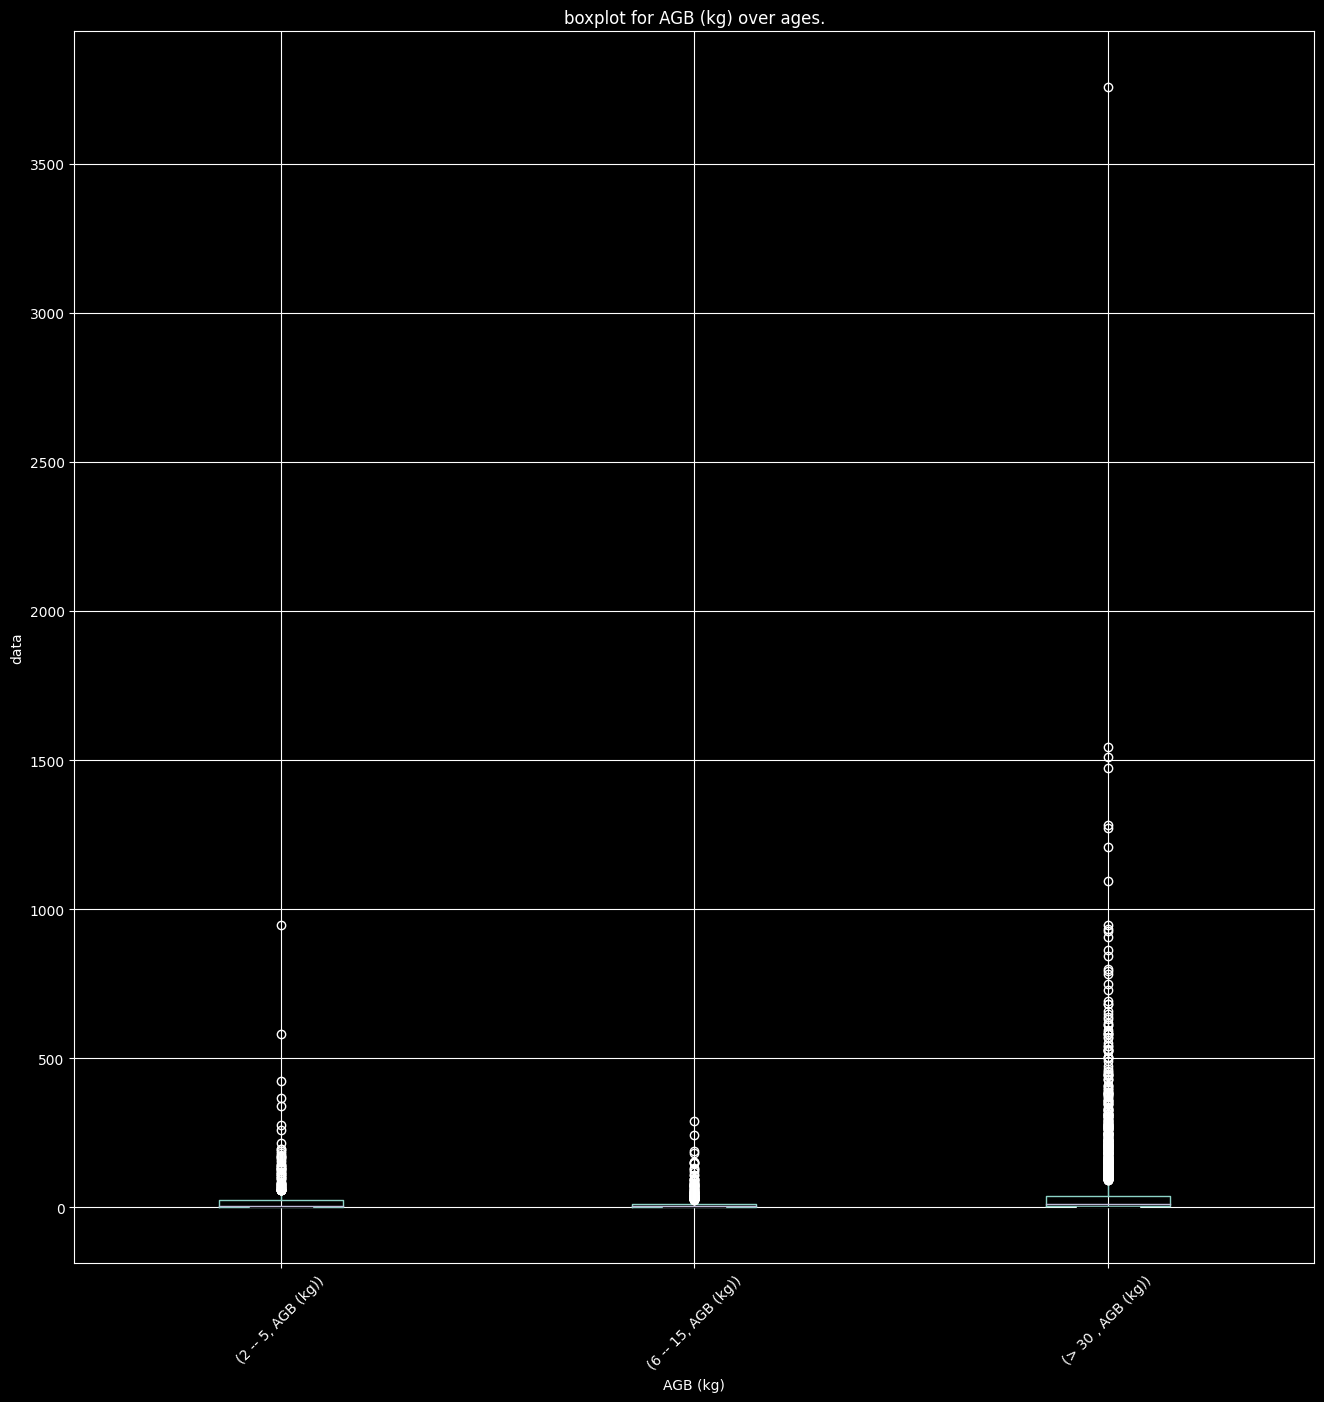

In [ ]:
#Boxplot DAP, HT, Density and AGB between Ages.
plt.style.use('dark_background')
for column in Data.columns:
  if Data[column].dtype == float:
    edad_plot.boxplot(subplots = False, figsize = (16,16), rot = 45, column = column)
    plt.title(f'boxplot for {column} over ages.')
    plt.xlabel(f'{column}')
    plt.ylabel('data')
    plt.show()


In [ ]:
edad_plot.get_group('2 -- 5').sort_values(by = 'HT', ascending = False)

,Parcela,Edades Aprox,Grupo_Florístico,Zona,Familia,Genero,Nombre Concatenado,Estrato,DAP1(cm),HT,Density (g/cm3),Habito Foliar,AGB (kg)
3829,120,2 -- 5,F,Z2,Fabaceae,Machaerium,Machaerium capote,Arbóreo inferior,14.960565,17.0,0.7308,Perenne,112.650550
3167,103,2 -- 5,G,Z2,Anacardiaceae,Astronium,Astronium graveolens,Arbóreo inferior,6.047888,17.0,0.8326,Semiperenne,23.356400
3462,112,2 -- 5,G,Z2,Fabaceae,Albizia,Albizia guachapele,Arbóreo inferior,32.149299,16.0,0.5496,Perenne,341.334473
3506,113,2 -- 5,G,Z2,Anacardiaceae,Astronium,Astronium graveolens,Arbóreo inferior,16.552114,15.0,0.8326,Semiperenne,136.791357
4607,139,2 -- 5,G,Z2,Malvaceae,Guazuma,Guazuma ulmifolia,Arbóreo inferior,23.873241,15.0,0.5273,Caducifolio,177.064982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,128,2 -- 5,G,Z2,Fabaceae,Chloroleucon,Chloroleucon mangense,Arbustivo,2.864789,2.0,0.9900,Semiperenne,0.914895
2611,59,2 -- 5,B,Z3,Erythroxylaceae,Erythroxylum,Erythroxylum haughtii,Arbustivo,2.737465,1.9,0.8023,Semiperenne,0.657816
2625,59,2 -- 5,B,Z3,Euphorbiaceae,Euphorbia,Euphorbia cotinifolia,Arbustivo,6.366198,1.9,0.4705,Semiperenne,1.937795
4625,140,2 -- 5,G,Z2,Malvaceae,Guazuma,Guazuma ulmifolia,Herbáceo,24.828171,1.5,0.5273,Semiperenne,22.081018


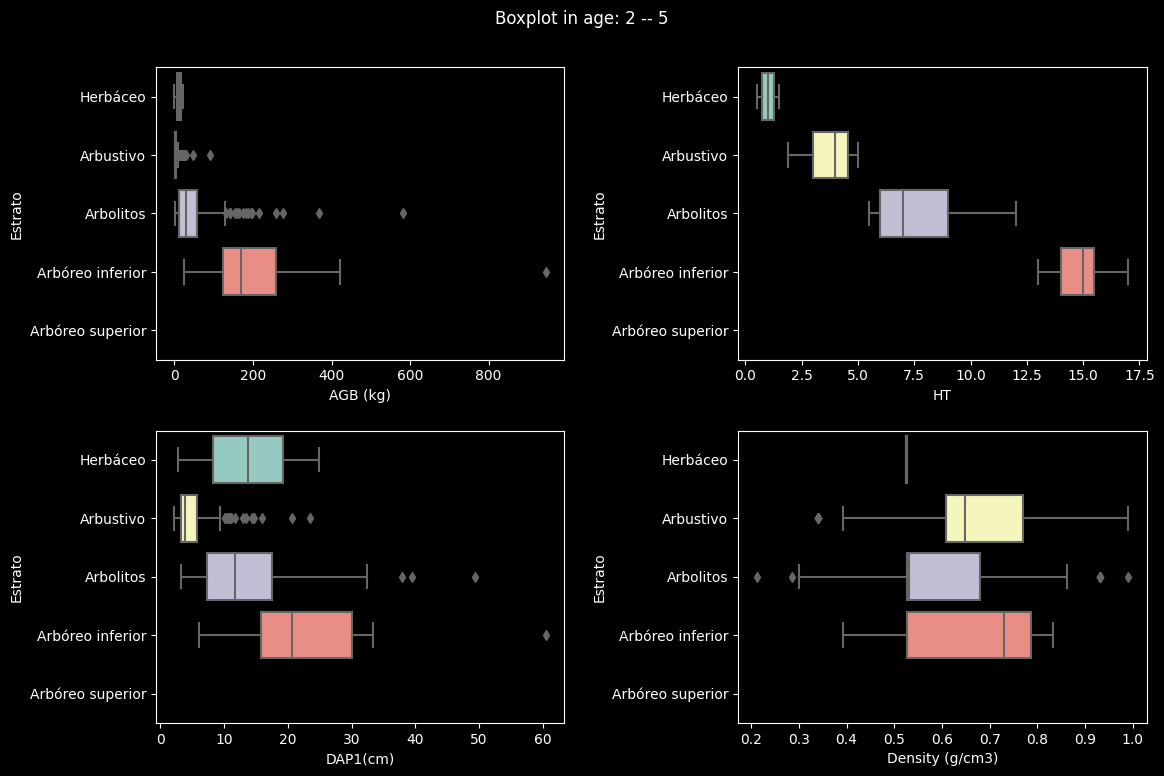

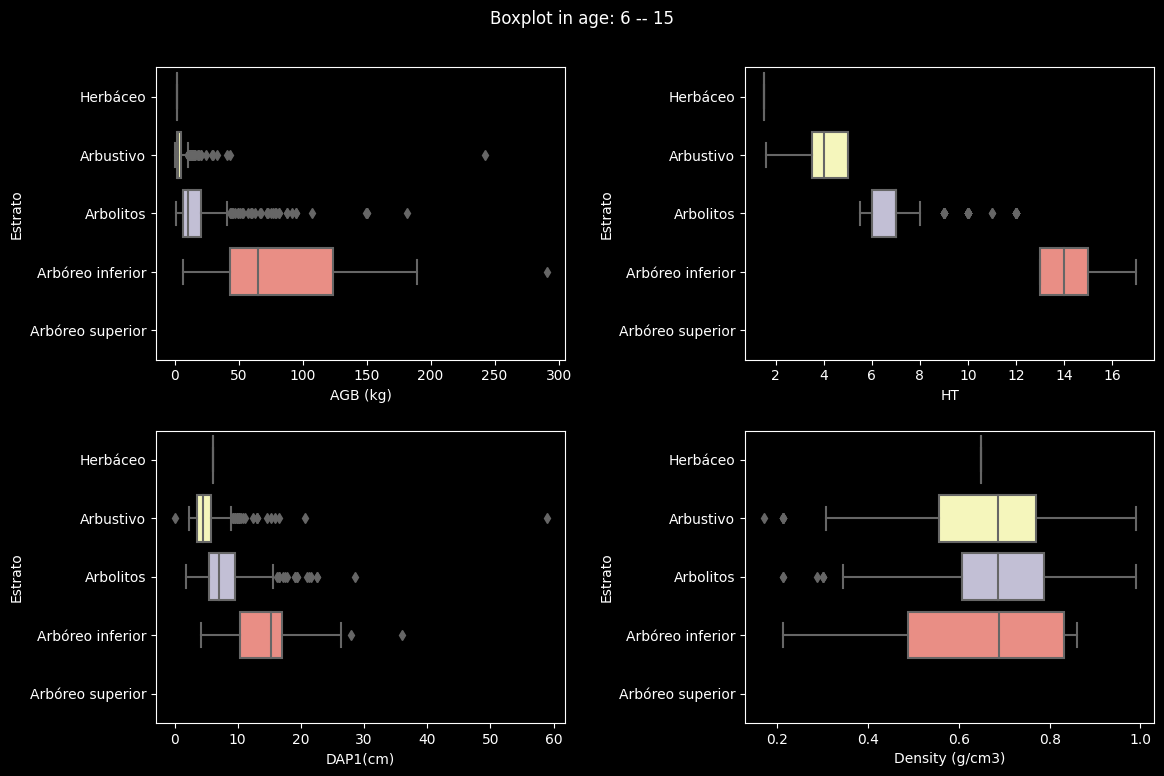

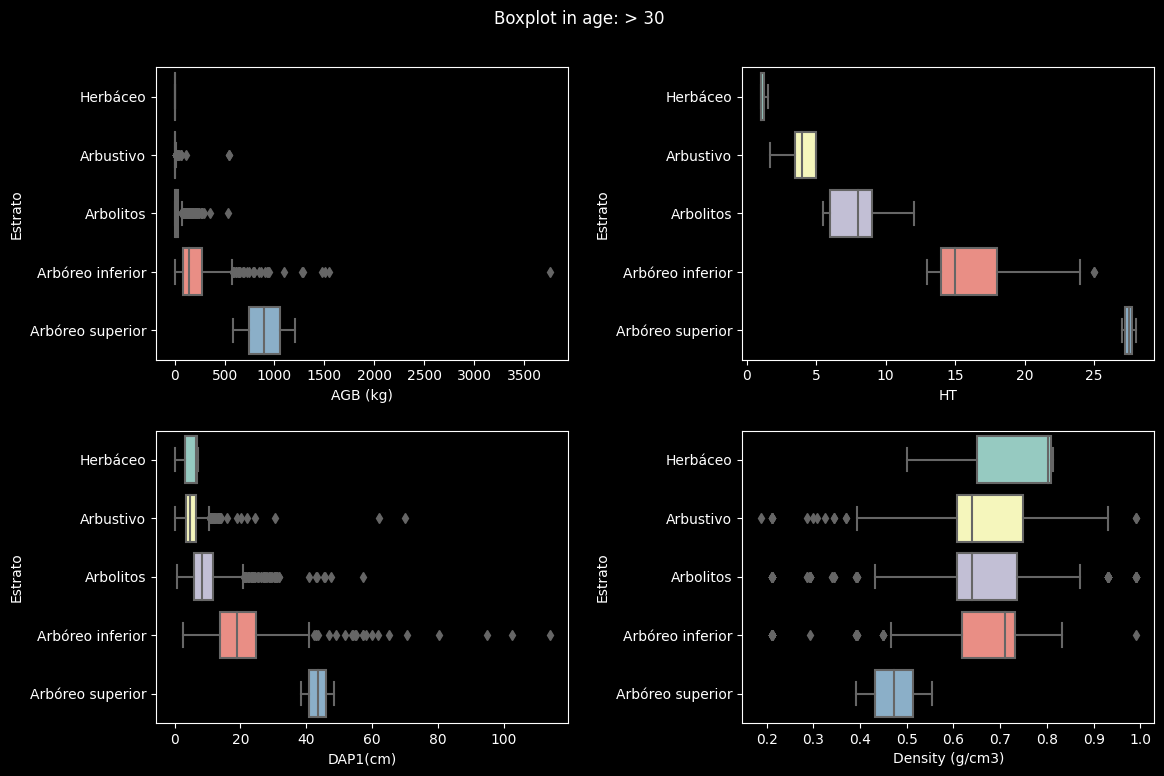

In [ ]:
columns_float = ['AGB (kg)', 'HT', 'DAP1(cm)', 'Density (g/cm3)'] #Avoid 'Parcela'
order = ['Herbáceo', 'Arbustivo', 'Arbolitos', 'Arbóreo inferior', 'Arbóreo superior']

for age in edad_plot.groups.keys():
  age_plot = edad_plot.get_group(age)
  plt.figure(figsize=(12, 8))

  for i, column in enumerate(columns_float, 1):
    plt.subplot(2, 2, i)
    plt.ylabel(column)
    sns.boxplot(x=column, y='Estrato', data=age_plot, order = order)
  plt.suptitle(f'Boxplot in age: {age}')
  plt.tight_layout(pad=2)
  plt.show()


  print('\n')

##Univariate Analysis

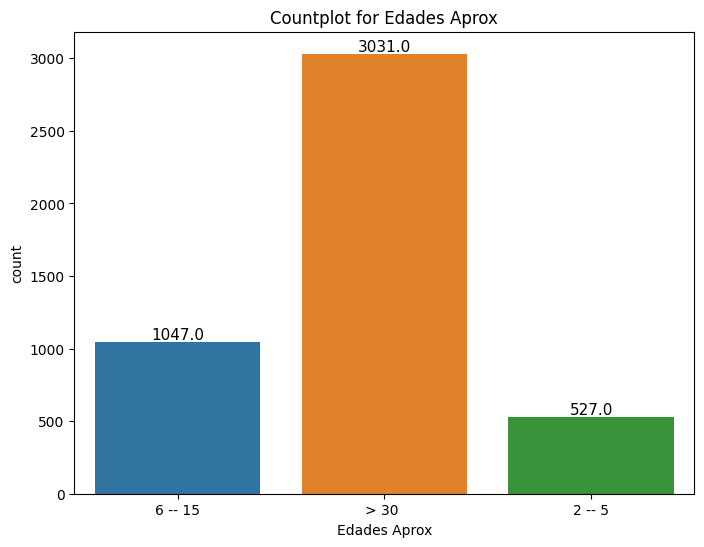

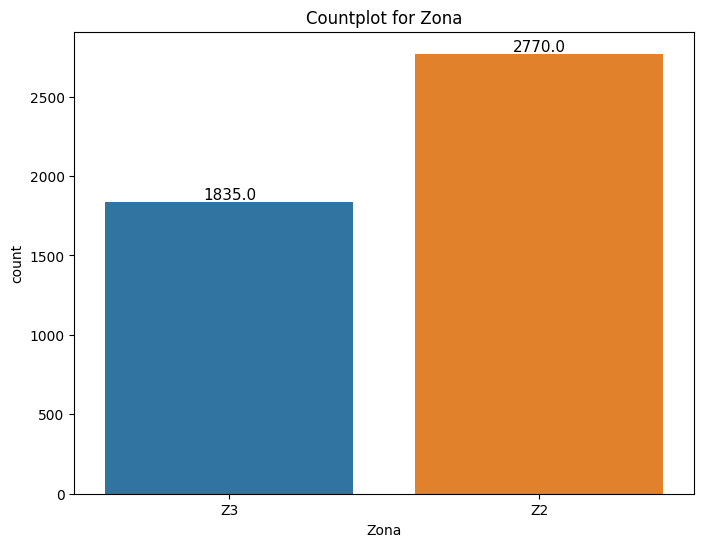

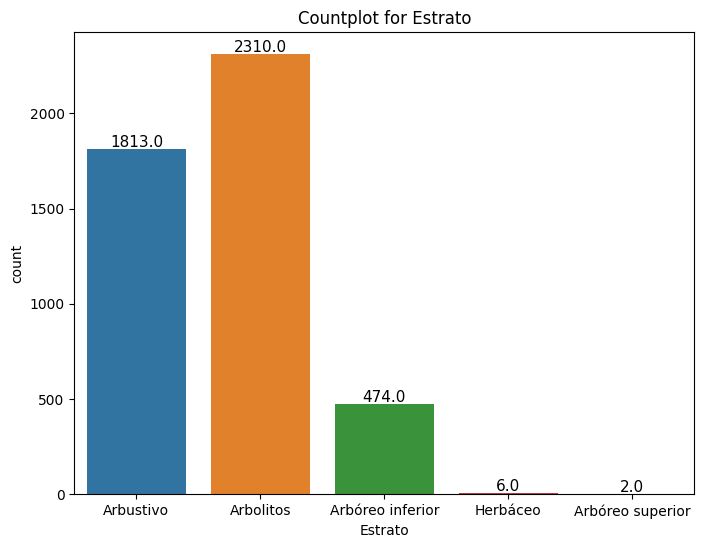

<ipython-input-24-16e6d7204384>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


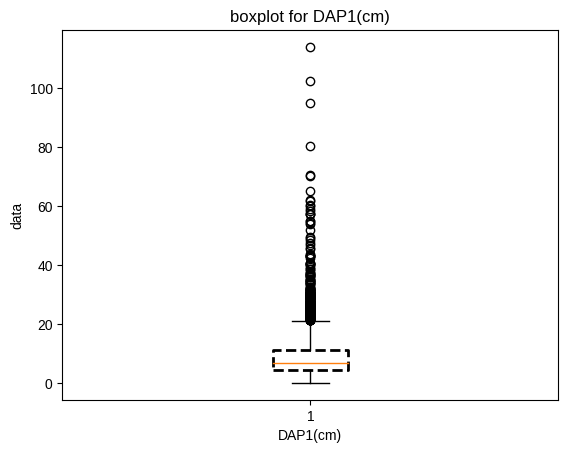

<ipython-input-24-16e6d7204384>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


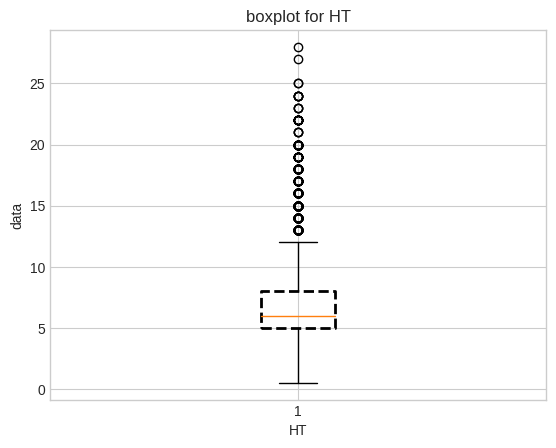

<ipython-input-24-16e6d7204384>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


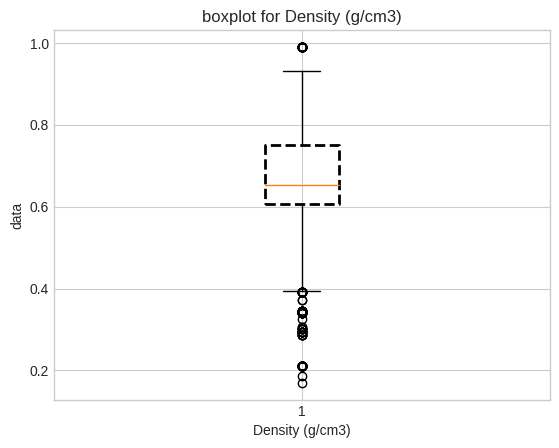

<ipython-input-24-16e6d7204384>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


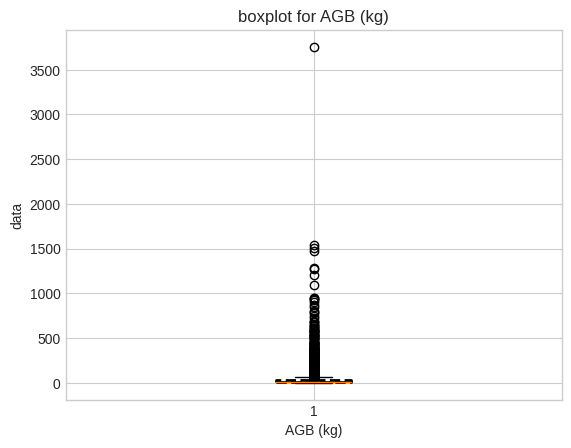

In [ ]:
plt.style.use('default')

for column in Data.columns:
  if Data[column].dtype == object:
    if column == 'Zona' or column == 'Edades Aprox' or column == 'Estrato':
      plt.figure(figsize=(8, 6))
      sns.countplot(data=Data, x=column)
      plt.title(f'Countplot for {column}')

      # Add frequency
      ax = plt.gca()
      for p in ax.patches:
          ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                      textcoords='offset points')

      plt.show()
  else:
    plt.boxplot(Data[column], boxprops = dict(linestyle='--', linewidth=2))
    plt.style.use('seaborn-whitegrid')
    plt.title(f'boxplot for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('data')
    plt.show()

<ipython-input-25-4778a20edf80>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


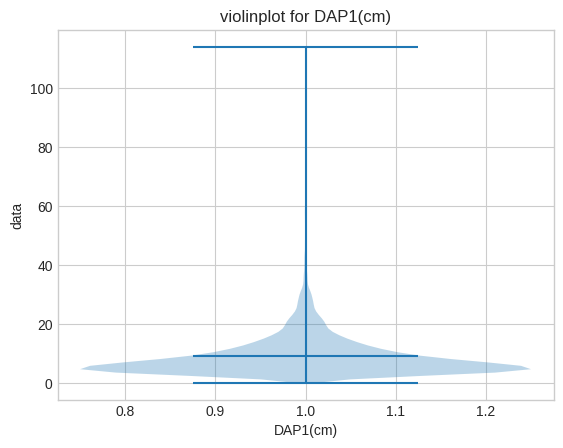

<ipython-input-25-4778a20edf80>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


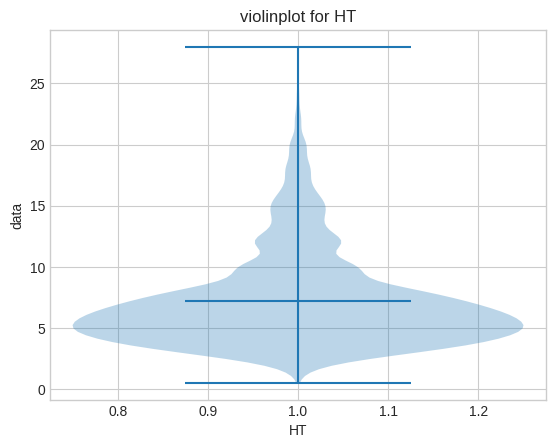

<ipython-input-25-4778a20edf80>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


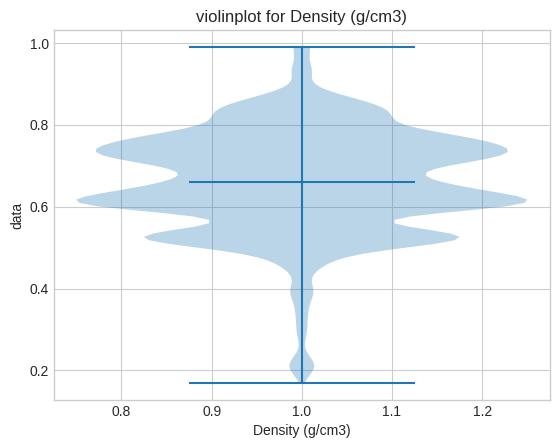

<ipython-input-25-4778a20edf80>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


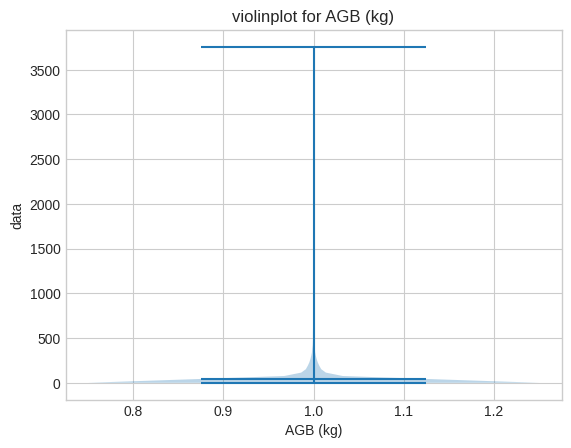

In [ ]:
for column in Data.columns:
  if Data[column].dtype == object:
    pass

  else:
    plt.violinplot(Data[column], showmeans = True)
    plt.style.use('seaborn-whitegrid')
    plt.title(f'violinplot for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('data')
    plt.show()

## Bivariate analysis

<ipython-input-26-96d03e506f17>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Data.corr()# plot the heatmap


<Axes: >

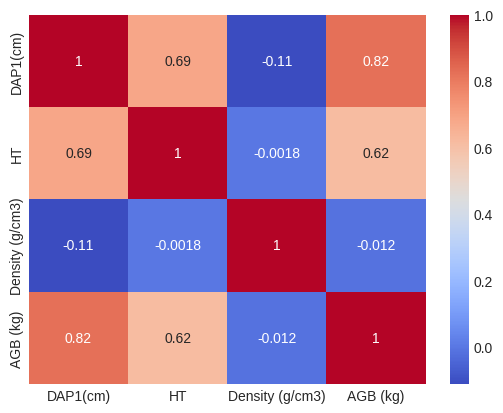

In [ ]:
# calculate correlation matrix
corr = Data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')

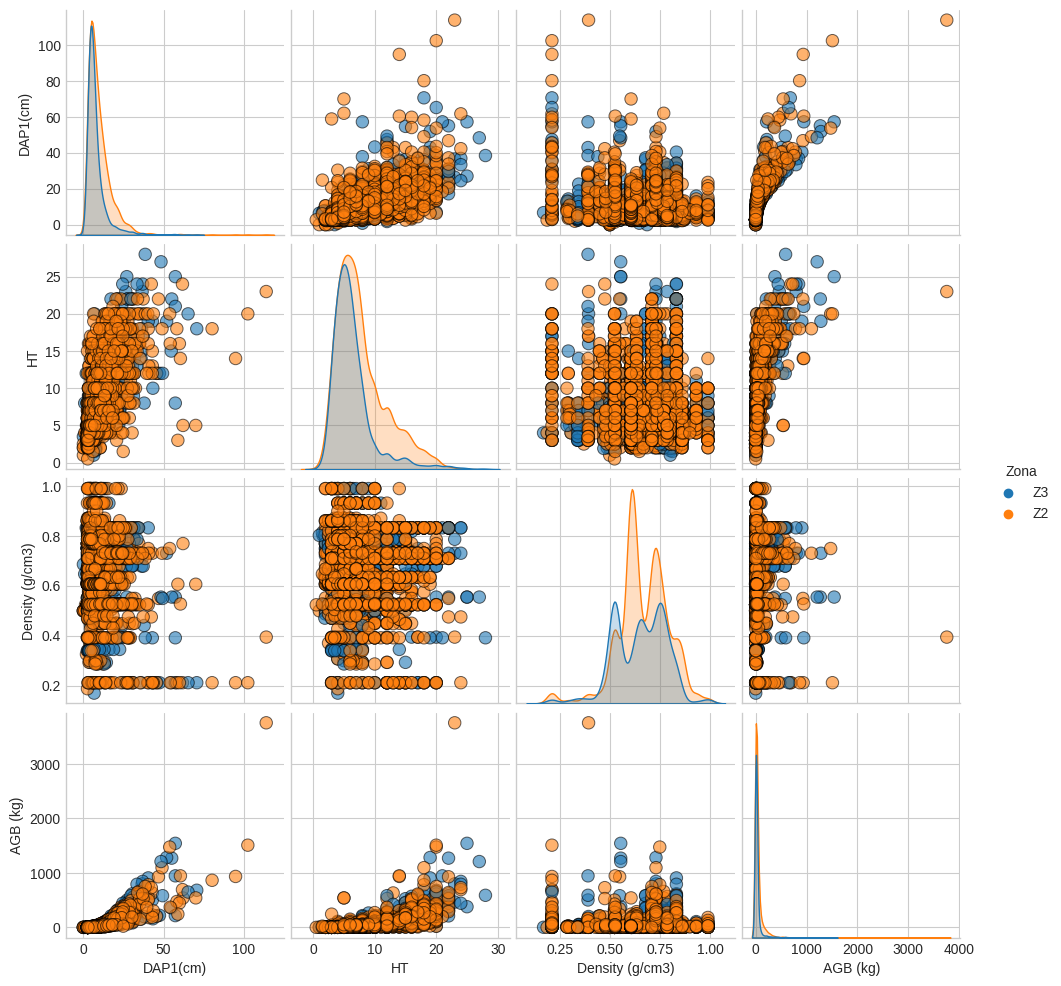

In [ ]:
#Complete scatter plot
sns.pairplot(Data, hue = 'Zona', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


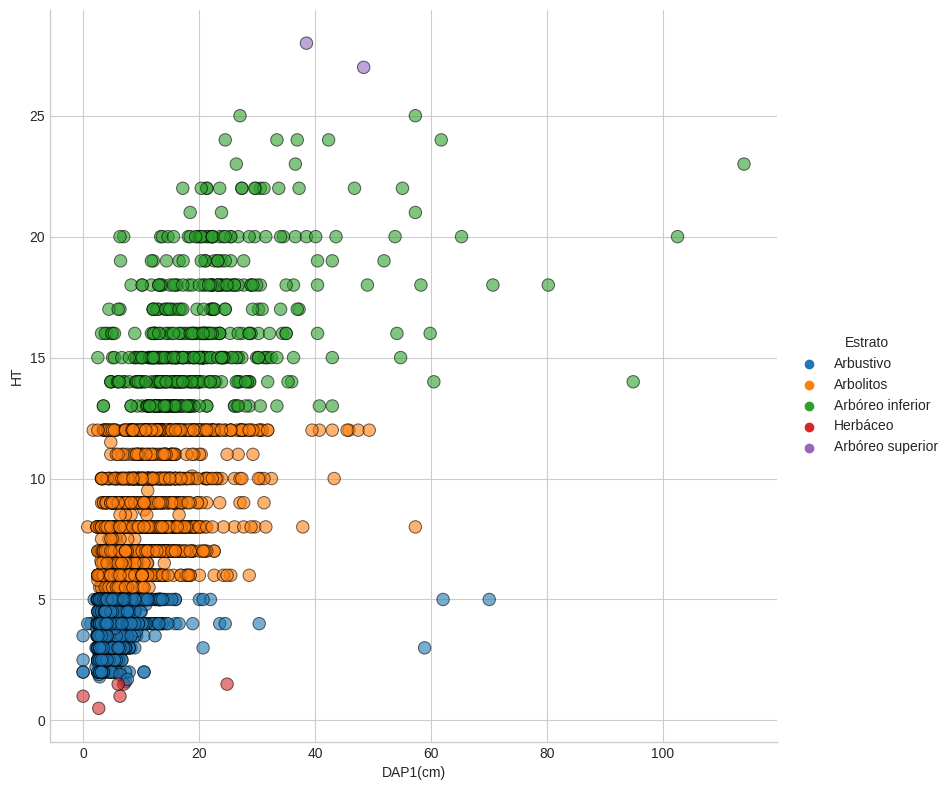

In [ ]:

sns.pairplot(Data, x_vars='DAP1(cm)', y_vars='HT', hue = 'Estrato', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 8)


#Sum AGB by plots.

In [ ]:
Data_Parcela = Data.groupby(by = 'Parcela') #Groupby Parcela

In [ ]:
AGB = pd.DataFrame(columns = ['N° parcela', 'Edad','AGB (kg)']) #Parcela - Edad - Biomass, Export to csv



for i,j in enumerate(Data_Parcela.groups.keys()):
  aux_var = []
  Biomass = Data_Parcela.get_group(j)
  Biomass = Biomass.iloc[:,-1].sum()

  Age = Data_Parcela.get_group(j)['Edades Aprox'].unique()


  aux_var.append(j)
  aux_var.append(Age)
  aux_var.append(Biomass)
  AGB.loc[len(AGB)] = aux_var



#Add coordenates
coordenates = pd.read_excel(coordenates_xlsx)

#Merge
AGB = AGB.merge(coordenates)

#Export
AGB.to_csv('Parcela_AGB.csv', index= False)

In [ ]:
AGB

,N° parcela,Edad,AGB (kg),latitude_dec,longitude_dec
0,1,[6 -- 15],206.628313,2.268957,-75.681033
1,2,[> 30 ],2306.094070,2.261810,-75.694398
2,3,[> 30 ],1972.413358,2.261131,-75.694819
3,4,[> 30 ],2536.726782,2.261365,-75.695916
4,5,[> 30 ],7312.043657,2.261401,-75.696158
...,...,...,...,...,...
74,138,[> 30 ],2125.553134,2.310133,-75.698181
75,139,[2 -- 5],1226.103160,2.308635,-75.687746
76,140,[2 -- 5],108.605819,2.310082,-75.687738
77,10_A,[> 30 ],3018.457760,2.290222,-75.701806


In [ ]:
#Delete files
!rm '/content/Data_Plots.xlsx'
!rm '/content/Densidades.xlsx'
!rm '/content/Species.xlsx'
!rm '/content/Coordenadas.xlsx'